# Online Sales Data Analysis Project

## Project Objective
To analyze online sales data to uncover trends, patterns, and insights that can inform business decisions. This includes understanding sales performance across different products, categories, regions, and payment methods, and preparing the data for visualization in a Looker dashboard.

## Dataset Overview
- **Rows**: 240 transactions
- **Columns**: 9 attributes including date, product details, sales metrics, region, and payment method

## Project Steps

### 1. Data Loading and Initial Exploration
- Load the dataset using Pandas
- Convert date columns to datetime objects
- Display the first few rows and dataset summary

### 2. Data Cleaning and Preparation
- Check for missing or duplicate data
- Ensure data types are appropriate
- Derive any new useful columns (e.g., month, revenue per unit)

### 3. Exploratory Data Analysis (EDA)
- Analyze sales trends over time
- Identify top-selling products and categories
- Evaluate performance by region and payment method
- Calculate summary statistics (mean, total revenue, etc.)

### 4. Data Visualization
- Create visualizations using Matplotlib and/or Seaborn
  - Revenue over time
  - Sales by category
  - Regional performance
  - Payment method breakdown

### 5. Looker Dashboard Preparation
- Identify key metrics and dimensions for the dashboard
- Prepare a cleaned and structured CSV file for Looker
- Define any LookML views or explores if needed

### 6. Predictive Modeling
Build a regression model to predict the total revenue of a transaction based on transaction attributes.
- Prepare feature set and target variable
- Encode categorical variables
- Split data into training and testing sets
- Train regression models (e.g., Linear Regression, Random Forest)
- Evaluate model performance (MAE, RMSE, R²)
- Interpret important features driving revenue


## Deliverables
- Jupyter Notebook with analysis and visualizations
- Cleaned dataset ready for Looker
- Dashboard design guide with suggested visual components

In [2]:
import pandas as pd                  # Data manipulation
import numpy as np                   # Numerical operations
import matplotlib.pyplot as plt      # Plotting
import seaborn as sns                # Statistical plotting

from sklearn.model_selection import train_test_split, GridSearchCV  # Data splitting and tuning
from sklearn.preprocessing import OneHotEncoder                     # Categorical encoding
from sklearn.compose import ColumnTransformer                       # Feature transformation pipeline
from sklearn.pipeline import Pipeline                               # Pipeline for modeling
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Evaluation metrics

from sklearn.ensemble import RandomForestRegressor                  # Baseline model
from sklearn.ensemble import GradientBoostingRegressor              # Best-performing model

import xgboost as xgb
from xgboost import XGBRegressor                                    # Alternative boosting model

In [3]:
# Load the dataset
file_path = "/Users/mattbaglietto/online_sales_project/Online Sales Data.csv"
df = pd.read_csv(file_path)

In [4]:
# Display dataset shape and basic info
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns\n")
print("Column Info:")
print(df.info())

# Preview the first few rows
df.head()


Dataset contains 240 rows and 9 columns

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB
None


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [5]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [7]:
# Verify Total Revenue is consistent
revenue_check = (df['Units Sold'] * df['Unit Price']).round(2) == df['Total Revenue'].round(2)
print(f"Inconsistent revenue entries: {(~revenue_check).sum()}")

Inconsistent revenue entries: 0


## Dataset Summary

The dataset contains **240** transactions with the following 9 columns:

| Column            | Description                                      | Data Type |
|-------------------|--------------------------------------------------|-----------|
| Transaction ID     | Unique identifier for each transaction           | Integer   |
| Date               | Transaction date                                 | DateTime  |
| Product Category   | Category of the product                          | Object    |
| Product Name       | Specific product name                            | Object    |
| Units Sold         | Number of units sold in the transaction          | Integer   |
| Unit Price         | Price per unit                                   | Float     |
| Total Revenue      | Units Sold × Unit Price                          | Float     |
| Region             | Geographic region of the buyer                   | Object    |
| Payment Method     | Payment method used (e.g., Credit Card, PayPal) | Object    |

### Data Quality Notes
- No missing values
- No duplicate rows
- `Total Revenue` is consistent with `Units Sold × Unit Price`
- `Date` column converted to datetime format

This dataset is clean and ready for exploratory analysis and modeling.

### A1. Revenue by Product Category

In [10]:
# Total revenue by product category
category_revenue = df.groupby('Product Category')['Total Revenue'].sum().sort_values(ascending=False)
print("Total Revenue by Product Category:")
print(category_revenue)

Total Revenue by Product Category:
Product Category
Electronics        34982.41
Home Appliances    18646.16
Sports             14326.52
Clothing            8128.93
Beauty Products     2621.90
Books               1861.93
Name: Total Revenue, dtype: float64


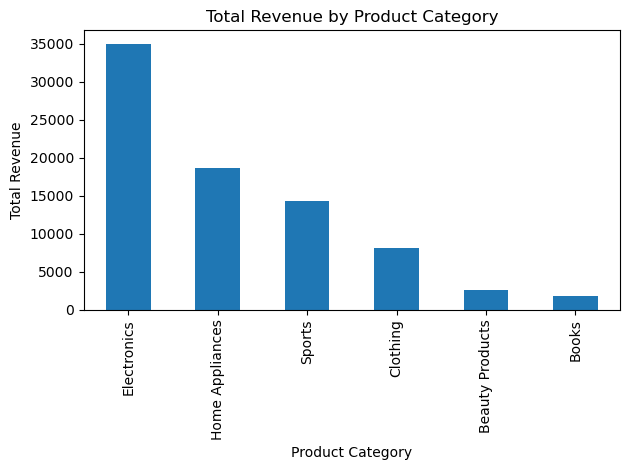

In [11]:
# Bar chart
category_revenue.plot(kind='bar', title='Total Revenue by Product Category')
plt.ylabel('Total Revenue')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()

The analysis of total revenue by product category shows a clear dominance of Electronics, followed by Home Appliances and Sports. The distribution is as follows:

| Product Category   | Total Revenue |
|--------------------|---------------|
| Electronics         | $34,982.41    |
| Home Appliances     | $18,646.16    |
| Sports              | $14,326.52    |
| Clothing            | $8,128.93     |
| Beauty Products     | $2,621.90     |
| Books               | $1,861.93     |

**Insights:**
- Electronics contributes the most to total revenue by a large margin.
- Books and Beauty Products generate the least revenue.
- There's a significant drop between the top 3 categories and the rest, suggesting focused marketing could be effective for mid-tier performers like Clothing and Sports.


### A2. Daily Revenue Over Time

In [14]:
# Aggregate revenue by date
daily_revenue = df.groupby('Date')['Total Revenue'].sum()

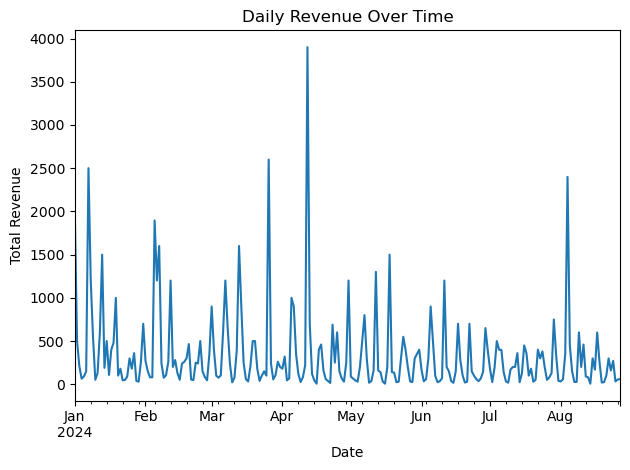

In [15]:
# Line plot of revenue over time
daily_revenue.plot(title='Daily Revenue Over Time')
plt.ylabel('Total Revenue')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

The line chart of total daily revenue from January to August 2024 shows high volatility in daily earnings, with several significant spikes. These spikes may be due to large purchases or promotional events.

**Observations:**
- Revenue fluctuates heavily day-to-day, indicating variability in sales volume.
- Major peaks are observed in early April and again in August.
- There are consistent smaller spikes throughout each month, possibly corresponding to weekends, marketing pushes, or product launches.

**To Consider:**
- Aggregating by week or month for a smoother trend line.
- Investigate peak days to understand the drivers behind high-revenue transactions.

### A3. Units Sold by Region

In [18]:
# Total units sold by region
region_units = df.groupby('Region')['Units Sold'].sum().sort_values(ascending=False)
print("Units Sold by Region:")
print(region_units)

Units Sold by Region:
Region
Asia             233
North America    180
Europe           105
Name: Units Sold, dtype: int64


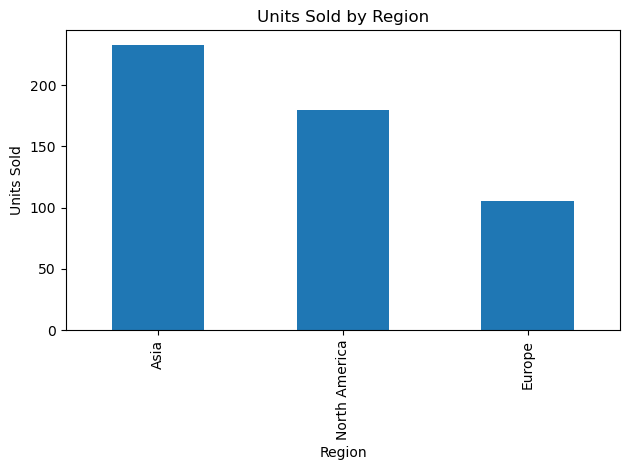

In [19]:
# Bar chart
region_units.plot(kind='bar', title='Units Sold by Region')
plt.ylabel('Units Sold')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

The bar chart shows the total number of units sold in each region:

| Region         | Units Sold |
|----------------|------------|
| Asia           | 233        |
| North America  | 180        |
| Europe         | 105        |

**Insights:**
- Asia leads in units sold, suggesting strong market demand or wider product reach.
- North America follows, while Europe trails significantly.
- The high unit volume in Asia could point to either broader customer base or greater transaction frequency.

**To Consider:**
- Compare revenue per unit across regions to assess profitability, not just volume.
- Consider breaking down by product category per region to identify localized trends.

### A4. Payment Method Distribution

In [22]:
# Count of transactions by payment method
payment_counts = df['Payment Method'].value_counts()
print("Transactions by Payment Method:")
print(payment_counts)

Transactions by Payment Method:
Payment Method
Credit Card    120
PayPal          80
Debit Card      40
Name: count, dtype: int64


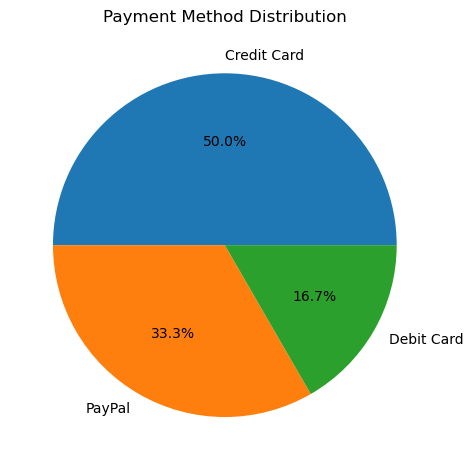

In [23]:
# Pie chart
payment_counts.plot(kind='pie', autopct='%1.1f%%', title='Payment Method Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

The pie chart and counts show how customers chose to pay:

| Payment Method | Transactions | Percentage |
|----------------|--------------|------------|
| Credit Card    | 120          | 50.0%      |
| PayPal         | 80           | 33.3%      |
| Debit Card     | 40           | 16.7%      |

**Insights:**
- Credit Cards are the dominant payment method, used in half of all transactions.
- PayPal holds a solid second place at one-third of payments.
- Debit Card usage is relatively low, indicating it may not be a preferred method in the current market.

**To Consider:**
- Analyze whether average order value differs by payment method.
- Investigate if payment preferences vary by region or product category.

### A5. Revenue Trends by Week and Month

In [26]:
# Add 'Week' and 'Month' columns
df['Week'] = df['Date'].dt.to_period('W').apply(lambda r: r.start_time)
df['Month'] = df['Date'].dt.to_period('M').astype(str)

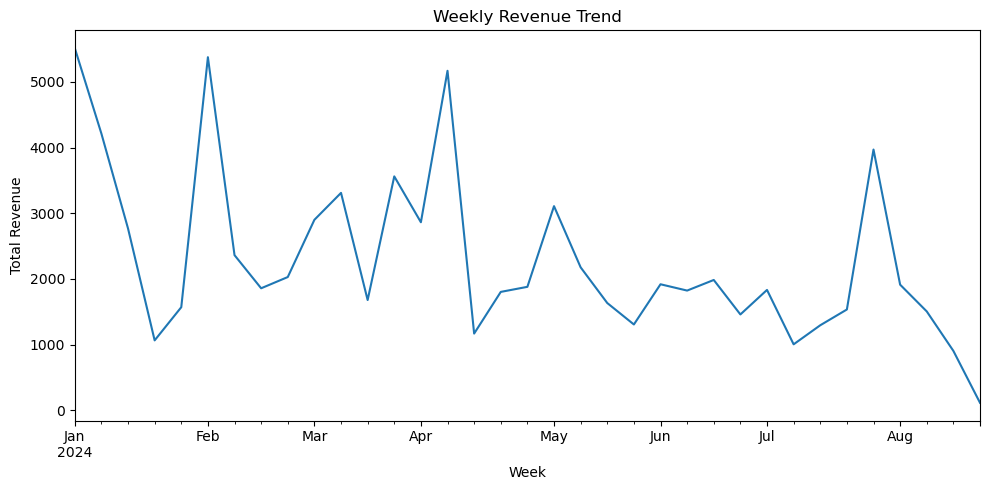

In [27]:
# Weekly Revenue
weekly_revenue = df.groupby('Week')['Total Revenue'].sum()
weekly_revenue.plot(title='Weekly Revenue Trend', figsize=(10,5))
plt.ylabel('Total Revenue')
plt.xlabel('Week')
plt.tight_layout()
plt.show()

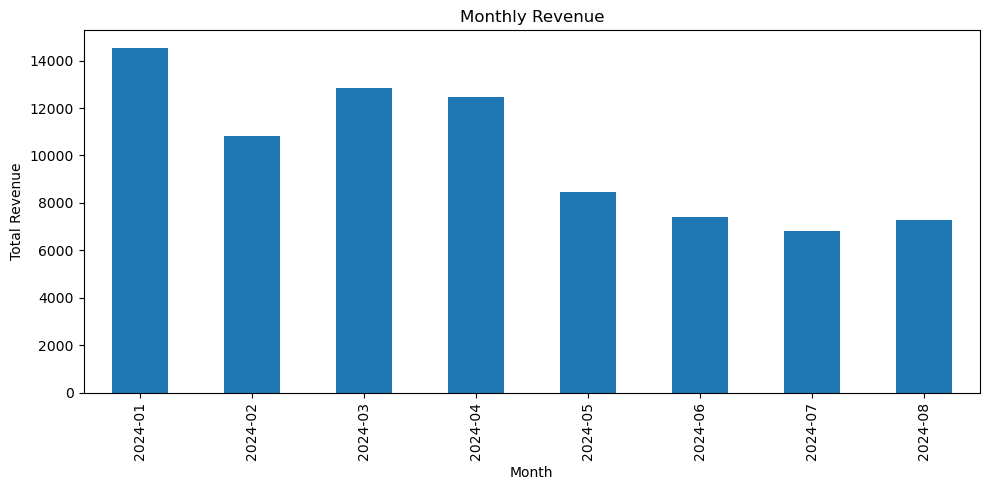

In [28]:
# Monthly Revenue
monthly_revenue = df.groupby('Month')['Total Revenue'].sum()
monthly_revenue.plot(kind='bar', title='Monthly Revenue', figsize=(10,5))
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

To smooth out daily fluctuations, revenue was aggregated weekly and monthly.

**Weekly Trends:**
- Revenue varies significantly week to week, with noticeable peaks in early January, late February, and April.
- Some dips are observed mid-year, particularly in June and July, indicating potential seasonal slowdowns or fewer promotions.

**Monthly Trends:**
- January had the highest total revenue, followed by March and April.
- There’s a clear declining trend from May through July, with a slight rebound in August.

**Insights:**
- Early-year sales are strong — possibly due to post-holiday shopping or marketing pushes.
- Mid-year softness could indicate an opportunity for targeted promotions or new product launches.

These trends suggest both seasonality and potential opportunities for more consistent revenue through marketing or product strategy.

### A6. Peak Revenue Days and Product Contributions

In [31]:
# Top 5 days by total revenue
top_days = df.groupby('Date')['Total Revenue'].sum().sort_values(ascending=False).head(5)
print("Top 5 Revenue Days:")
print(top_days)

Top 5 Revenue Days:
Date
2024-04-12    3899.99
2024-03-26    2599.98
2024-01-07    2499.99
2024-08-04    2399.00
2024-01-01    1999.98
Name: Total Revenue, dtype: float64


In [32]:
# Filter transactions on those days
peak_transactions = df[df['Date'].isin(top_days.index)].sort_values(by='Date')

In [33]:
# Group peak day transactions by product category and product name
peak_summary = peak_transactions.groupby(['Date', 'Product Category', 'Product Name'])['Total Revenue'].sum().sort_values(ascending=False)
print("\nRevenue Breakdown on Peak Days:")
print(peak_summary)


Revenue Breakdown on Peak Days:
Date        Product Category  Product Name             
2024-04-12  Electronics       Canon EOS R5 Camera          3899.99
2024-03-26  Home Appliances   LG OLED TV                   2599.98
2024-01-07  Electronics       MacBook Pro 16-inch          2499.99
2024-08-04  Electronics       Apple MacBook Pro 16-inch    2399.00
2024-01-01  Electronics       iPhone 14 Pro                1999.98
Name: Total Revenue, dtype: float64


In [34]:
# Aggregate revenue by date and category for top 5 revenue days
peak_day_category_revenue = (
    peak_transactions.groupby(['Date', 'Product Category'])['Total Revenue']
    .sum()
    .reset_index()
)

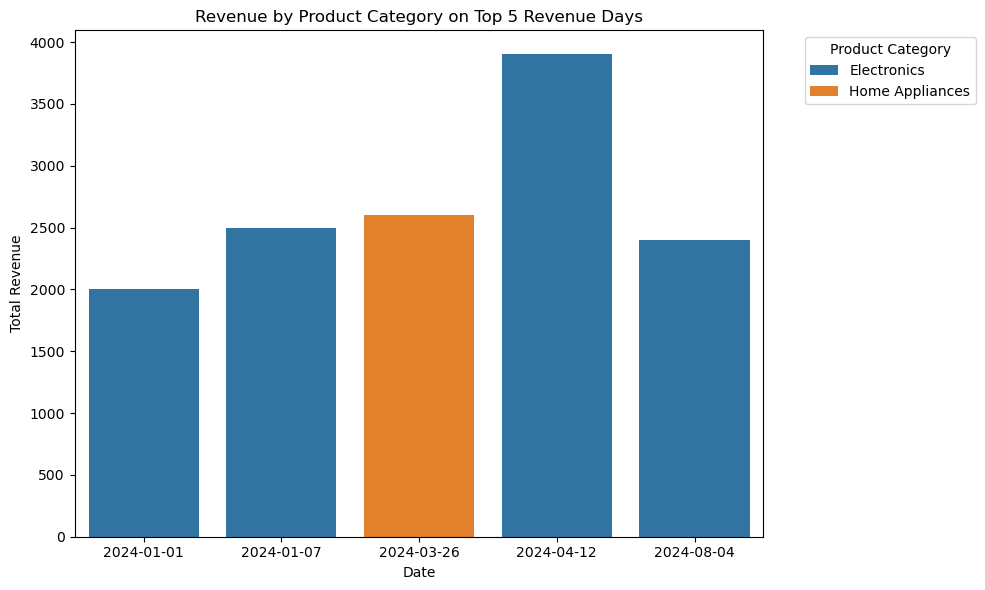

In [35]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=peak_day_category_revenue, x='Date', y='Total Revenue', hue='Product Category')
plt.title('Revenue by Product Category on Top 5 Revenue Days')
plt.ylabel('Total Revenue')
plt.xlabel('Date')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

A bar chart and breakdown of the top 5 revenue-generating days show a strong concentration of revenue driven by high-end electronics and appliances.

#### Top 5 Revenue Days:
| Date       | Total Revenue |
|------------|----------------|
| 2024-04-12 | $3,899.99      |
| 2024-03-26 | $2,599.98      |
| 2024-01-07 | $2,499.99      |
| 2024-08-04 | $2,399.00      |
| 2024-01-01 | $1,999.98      |

#### Drivers of Revenue on Peak Days:
- **2024-04-12**: Canon EOS R5 Camera
- **2024-03-26**: LG OLED TV
- **2024-01-07**: MacBook Pro 16-inch
- **2024-08-04**: Apple MacBook Pro 16-inch
- **2024-01-01**: iPhone 14 Pro

**Insights:**
- High-value electronics dominate peak days.
- These are likely one-time large purchases rather than high-volume transactions.
- The peak pattern aligns closely with premium product releases or promotional campaigns.

This helps identify when and what to promote for maximum short-term revenue impact.

### A7. Revenue per Unit by Region

In [38]:
# Calculate revenue per unit for each transaction
df['Revenue per Unit'] = df['Total Revenue'] / df['Units Sold']

In [39]:
# Group by Region and calculate average revenue per unit
revenue_per_unit_region = df.groupby('Region')['Revenue per Unit'].mean().sort_values(ascending=False)
print("Average Revenue per Unit by Region:")
print(revenue_per_unit_region)

Average Revenue per Unit by Region:
Region
North America    353.87225
Europe           190.90425
Asia             164.41025
Name: Revenue per Unit, dtype: float64


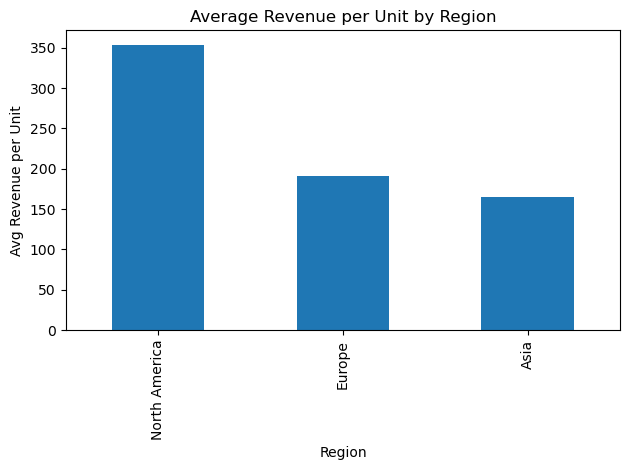

In [40]:
# Bar chart
revenue_per_unit_region.plot(kind='bar', title='Average Revenue per Unit by Region')
plt.ylabel('Avg Revenue per Unit')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

This analysis compares the **average revenue earned per unit sold** across different regions.

| Region         | Avg Revenue per Unit |
|----------------|----------------------|
| North America  | $353.87              |
| Europe         | $190.90              |
| Asia           | $164.41              |

**Insights:**
- **North America** generates significantly higher revenue per unit, suggesting a preference for high-value products such as premium electronics.
- **Asia**, despite having the highest unit sales, has the lowest revenue per unit, indicating a volume-driven market with lower average transaction values.
- **Europe** falls in between, showing a balanced mix of product values.

This insight is valuable for tailoring marketing, pricing, and product mix by region — emphasizing high-margin items in North America and high-volume strategies in Asia.

### A8. Product Category Revenue by Region

In [43]:
# Aggregate total revenue by product category and region
category_region_revenue = (
    df.groupby(['Region', 'Product Category'])['Total Revenue']
    .sum()
    .reset_index()
)

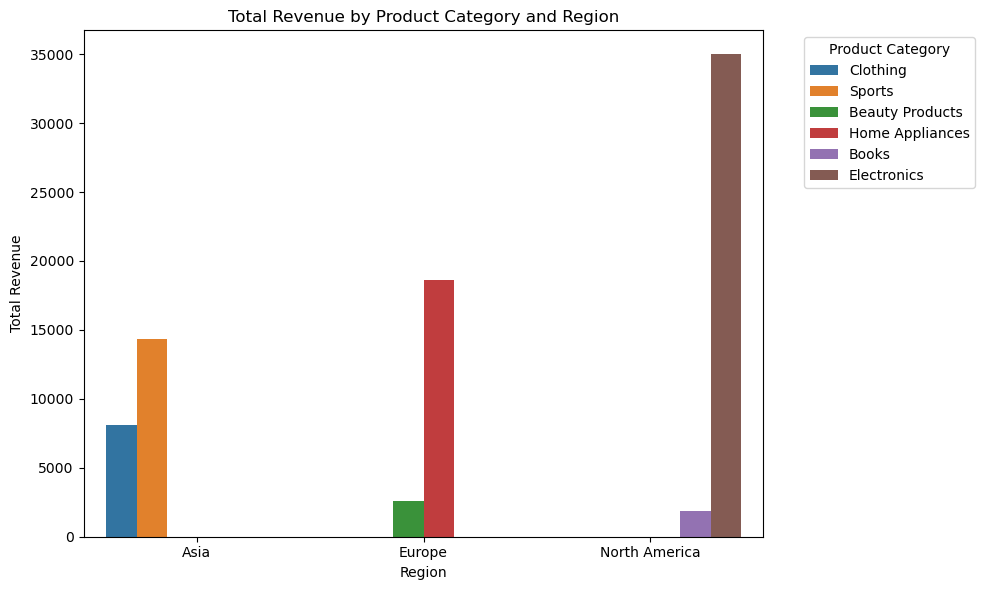

In [44]:
# Create a grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=category_region_revenue, x='Region', y='Total Revenue', hue='Product Category')
plt.title('Total Revenue by Product Category and Region')
plt.ylabel('Total Revenue')
plt.xlabel('Region')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This visualization compares total revenue by product category across different regions.

**Key Observations:**

- **North America** is dominated by **Electronics**, generating over $35,000 in revenue — far more than any other category or region.
- **Europe** sees the highest revenue from **Home Appliances**, with a smaller contribution from Beauty Products.
- **Asia** shows a stronger preference for **Sports** and **Clothing**, indicating a more lifestyle-oriented market.

**Insights:**

- North America is a premium electronics market — ideal for high-ticket tech products.
- Europe prefers practical, mid-value goods like appliances.
- Asia’s volume comes from categories that likely have lower price points but higher frequency of purchase.

This regional breakdown supports strategic inventory allocation, region-specific promotions, and tailored product mixes.

### A9. Average Order Value by Payment Method

In [47]:
# Calculate AOV per payment method
aov_by_payment = df.groupby('Payment Method')['Total Revenue'].mean().sort_values(ascending=False)
print("Average Order Value by Payment Method:")
print(aov_by_payment)

Average Order Value by Payment Method:
Payment Method
Credit Card    426.423833
PayPal         265.850750
Debit Card     203.223250
Name: Total Revenue, dtype: float64


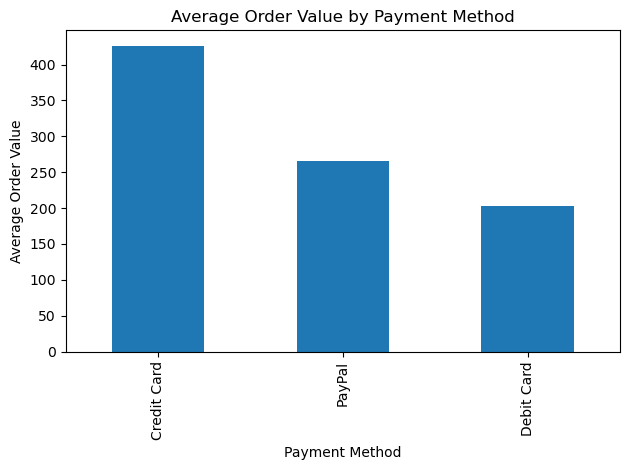

In [48]:
# Bar chart
aov_by_payment.plot(kind='bar', title='Average Order Value by Payment Method')
plt.ylabel('Average Order Value')
plt.xlabel('Payment Method')
plt.tight_layout()
plt.show()

This analysis shows the typical transaction value based on the payment method used.

| Payment Method | Avg Order Value |
|----------------|------------------|
| Credit Card    | $426.42          |
| PayPal         | $265.85          |
| Debit Card     | $203.22          |

**Insights:**
- **Credit Card** users spend significantly more per transaction, indicating a strong correlation with high-value purchases.
- **PayPal** and **Debit Card** transactions are associated with lower average spend, potentially pointing to budget-conscious buyers or smaller product types.
- This trend may reflect the credit-enabled buying power of card users and the convenience of one-click purchases.

These insights could guide UX optimization (e.g., defaulting to card options for high-ticket items) and audience segmentation.

### A10. Payment Preferences by Product Category and Region

In [51]:
# Count of payment methods per product category
payment_by_category = df.groupby(['Product Category', 'Payment Method']).size().unstack().fillna(0)
print("Payment Method Counts by Product Category:")
print(payment_by_category)

Payment Method Counts by Product Category:
Payment Method    Credit Card  Debit Card  PayPal
Product Category                                 
Beauty Products           0.0         0.0    40.0
Books                    40.0         0.0     0.0
Clothing                  0.0        40.0     0.0
Electronics              40.0         0.0     0.0
Home Appliances           0.0         0.0    40.0
Sports                   40.0         0.0     0.0


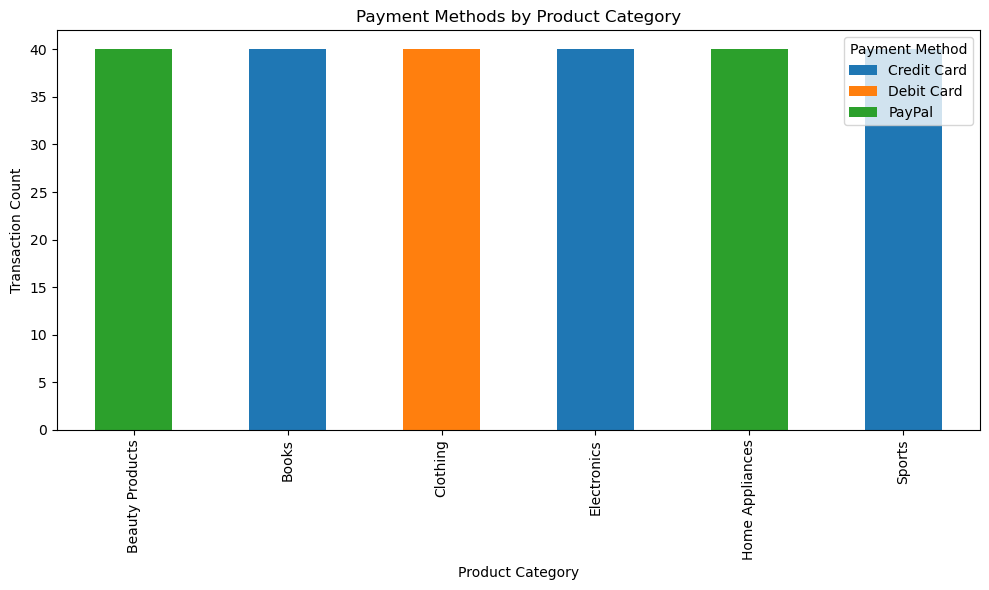

In [52]:
# Stacked bar chart
payment_by_category.plot(kind='bar', stacked=True, figsize=(10, 6), title='Payment Methods by Product Category')
plt.ylabel('Transaction Count')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()

This analysis explores how payment method usage varies across product categories and regions.

#### Payment Method by Product Category:

| Product Category   | Credit Card | Debit Card | PayPal |
|--------------------|-------------|------------|--------|
| Beauty Products    | 0           | 0          | 40     |
| Books              | 40          | 0          | 0      |
| Clothing           | 0           | 40         | 0      |
| Electronics        | 40          | 0          | 0      |
| Home Appliances    | 0           | 0          | 40     |
| Sports             | 40          | 0          | 0      |

**Insights:**
- **Clear preferences exist by product type**:
  - Electronics, Books, and Sports are exclusively paid for with **Credit Cards**.
  - Clothing purchases are entirely made with **Debit Cards**.
  - Home Appliances and Beauty Products are purchased exclusively via **PayPal**.
- This could reflect buyer demographics, platform behavior, or pricing strategy differences across product types.

### A11. Payment Preferences by Region

In [55]:
# Count of payment methods per region
payment_by_region = df.groupby(['Region', 'Payment Method']).size().unstack().fillna(0)
print("Payment Method Counts by Region:")
print(payment_by_region)

Payment Method Counts by Region:
Payment Method  Credit Card  Debit Card  PayPal
Region                                         
Asia                   40.0        40.0     0.0
Europe                  0.0         0.0    80.0
North America          80.0         0.0     0.0


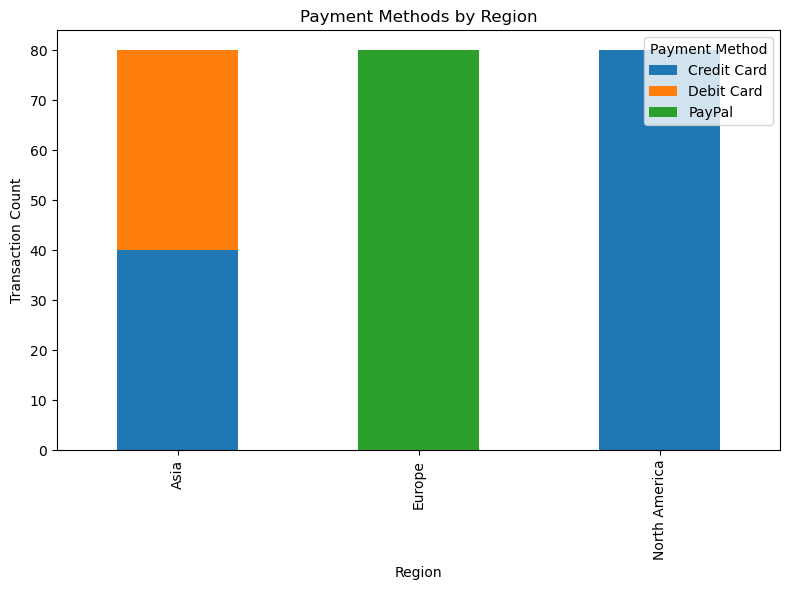

In [56]:
# Stacked bar chart
payment_by_region.plot(kind='bar', stacked=True, figsize=(8, 6), title='Payment Methods by Region')
plt.ylabel('Transaction Count')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

This analysis explores how preferred payment methods vary by geographic region.

| Region         | Credit Card | Debit Card | PayPal |
|----------------|-------------|------------|--------|
| Asia           | 40          | 40         | 0      |
| Europe         | 0           | 0          | 80     |
| North America  | 80          | 0          | 0      |

**Insights:**
- **North America** uses **Credit Cards** exclusively.
- **Europe** relies entirely on **PayPal**, suggesting platform or cultural preferences.
- **Asia** has a mixed behavior — evenly split between **Credit Card** and **Debit Card** usage.

This highlights the importance of **regional payment method support** in international sales — optimizing for each region’s preferred method can directly impact conversion rates and customer satisfaction.

## B1. Predictive Modeling: Total Revenue

In [59]:
# Create time-based numeric features
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [60]:
# Define feature set (exclude raw datetime & high-cardinality product name)
df_model = df.drop(columns=[
    'Transaction ID', 'Date', 'Product Name', 'Total Revenue', 'Revenue per Unit', 'Week'
])

In [61]:
# Define features and target
X = df_model.copy()
y = df['Total Revenue']

In [62]:
# Identify categorical columns to encode
categorical_cols = ['Product Category', 'Region', 'Payment Method']

In [63]:
# One-hot encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

In [64]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Modeling pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [66]:
# Fit and evaluate model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [67]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [68]:
print(f"MAE: ${mae:.2f}")
print(f"RMSE: ${rmse:.2f}")
print(f"R² Score: {r2:.3f}")

MAE: $46.07
RMSE: $100.80
R² Score: 0.944


A regression model was built to predict transaction-level **Total Revenue** using features such as product category, units sold, unit price, region, and payment method.

### Model: Random Forest Regressor

#### Features Used:
- Product Category (one-hot encoded)
- Units Sold
- Unit Price
- Region (one-hot encoded)
- Payment Method (one-hot encoded)
- Month of Transaction
- Day of Week

#### Model Performance:
| Metric       | Value     |
|--------------|-----------|
| MAE          | $46.07    |
| RMSE         | $100.80   |
| R² Score     | 0.944     |

**Interpretation:**
- The model explains **94.4%** of the variance in total revenue.
- Prediction errors are generally small, with an average absolute error of just $46 per transaction.
- Strong predictive performance out of the box without tuning.

This model provides a reliable foundation for estimating revenue potential of future transactions or simulating outcomes based on changes in product, pricing, or customer segments.

### B2. Feature Importance: Drivers of Total Revenue

In [71]:
# Get feature names from the one-hot encoder + passthrough
onehot_feature_names = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(['Product Category', 'Region', 'Payment Method'])
numeric_features = [col for col in X.columns if col not in ['Product Category', 'Region', 'Payment Method']]
all_features = np.concatenate([onehot_feature_names, numeric_features])

In [72]:
# Extract feature importances
importances = model.named_steps['regressor'].feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

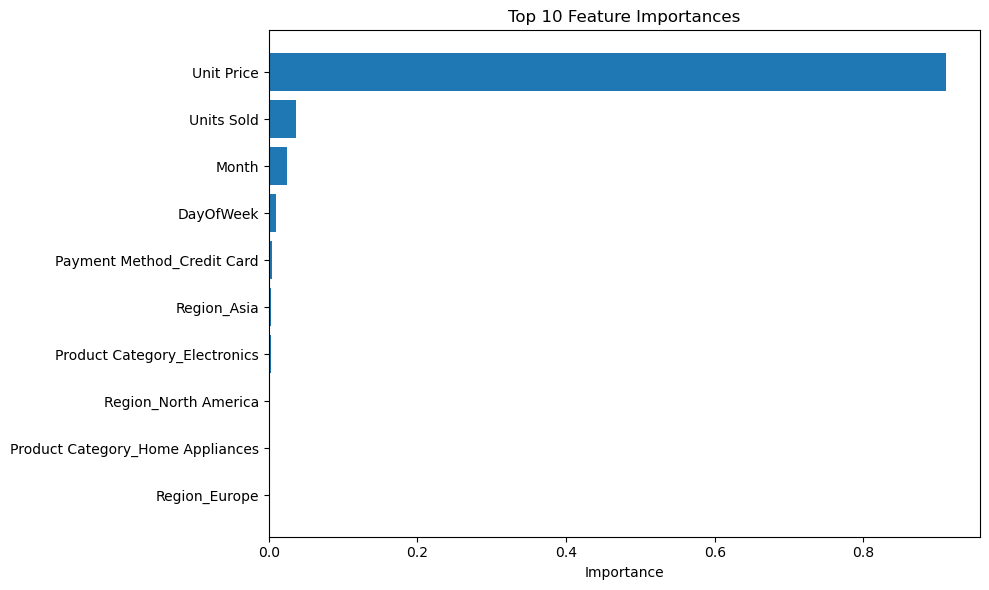

In [73]:
# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10][::-1], feature_importance_df['Importance'][:10][::-1])
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [74]:
# Display full importance list
feature_importance_df.reset_index(drop=True, inplace=True)
feature_importance_df.head(15)

,Feature,Importance
0,Unit Price,0.911253
1,Units Sold,0.037120
2,Month,0.023964
3,DayOfWeek,0.009446
4,Payment Method_Credit Card,0.004535
5,Region_Asia,0.003515
6,Product Category_Electronics,0.003304
7,Region_North America,0.001933
8,Product Category_Home Appliances,0.001831
9,Region_Europe,0.001368


To understand which features most influenced the model’s revenue predictions, we extracted feature importances from the trained Random Forest.

#### Top Influential Features

| Feature                        | Importance |
|-------------------------------|------------|
| Unit Price                    | 0.911      |
| Units Sold                    | 0.037      |
| Month                         | 0.024      |
| Day of Week                   | 0.009      |
| Payment Method: Credit Card   | 0.0045     |
| Region: Asia                  | 0.0035     |
| Product Category: Electronics | 0.0033     |

**Insights:**
- **Unit Price** dominates model influence — it explains 91% of prediction variance. This makes sense given revenue is a direct function of price.
- **Units Sold** and **Month** also have moderate impact, indicating quantity and timing still shape outcomes.
- Features like region and product category have **minimal predictive influence** — useful for business segmentation, but not major drivers of per-transaction revenue.

This validates the model's logic and helps stakeholders trust its output.

### B3. Gradient Boosting Regression Model

In [77]:
# Define Gradient Boosting model pipeline
gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

In [78]:
# Train and evaluate
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

In [79]:
# Metrics
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_r2 = r2_score(y_test, gb_pred)

In [80]:
print("Gradient Boosting:")
print(f"MAE: ${gb_mae:.2f}")
print(f"RMSE: ${gb_rmse:.2f}")
print(f"R² Score: {gb_r2:.3f}")

Gradient Boosting:
MAE: $26.43
RMSE: $40.75
R² Score: 0.991


After evaluating Random Forest, a **Gradient Boosting Regressor** was trained to improve predictive accuracy.

#### Model Performance:

| Metric       | Value     |
|--------------|-----------|
| MAE          | $26.43    |
| RMSE         | $40.75    |
| R² Score     | 0.991     |

**Comparison to Random Forest:**
- MAE reduced by ~43% (from $46.07 → $26.43)
- RMSE cut by ~60%, showing fewer large errors
- R² increased from 0.944 to 0.991 — capturing nearly all variance in the data

**Conclusion:**
Gradient Boosting outperforms Random Forest significantly on this dataset. It is highly suitable for predicting transaction-level revenue and provides robust accuracy with minimal error, making it a top choice for deployment or integration.

### B4. XGBoost Regression Model

In [83]:
# Define XGBoost pipeline
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, random_state=42))
])

In [84]:
# Train and evaluate
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [85]:
# Metrics
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)

In [86]:
print("XGBoost:")
print(f"MAE: ${xgb_mae:.2f}")
print(f"RMSE: ${xgb_rmse:.2f}")
print(f"R² Score: {xgb_r2:.3f}")

XGBoost:
MAE: $23.46
RMSE: $48.29
R² Score: 0.987


An XGBoost regressor was trained and evaluated to compare with previous models.

#### Model Performance:

| Metric       | Value     |
|--------------|-----------|
| MAE          | $23.46    |
| RMSE         | $48.29    |
| R² Score     | 0.987     |

**Comparison to Gradient Boosting:**
- Slightly **lower MAE** ($23.46 vs. $26.43)
- Slightly **higher RMSE**, suggesting more error on some larger predictions
- **Slightly lower R²** (0.987 vs. 0.991), but still excellent

**Conclusion:**
XGBoost performs exceptionally well and has the **lowest mean error (MAE)**. However, Gradient Boosting has slightly better overall balance with higher R² and lower RMSE. Both models are viable and strong — final selection may depend on business goals (consistency vs. average error minimization).

## B4. Final Model: Tuned Gradient Boosting Regressor

In [89]:
# Final preprocessing step
categorical_cols = ['Product Category', 'Region', 'Payment Method']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
    force_int_remainder_cols=False
)

In [90]:
# Final tuned Gradient Boosting pipeline
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(
        learning_rate=0.1,
        max_depth=4,
        n_estimators=200,
        random_state=42
    ))
])

In [91]:
# Fit the model
final_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Product Category', 'Region',
                                                   'Payment Method'])],
                                   verbose_feature_names_out=False)),
                ('regressor',
                 GradientBoostingRegressor(max_depth=4, n_estimators=200,
                                           random_state=42))])

In [92]:
# Predict and evaluate
y_pred = final_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [93]:
print(f"Final Model Performance:")
print(f"MAE: ${mae:.2f}")
print(f"RMSE: ${rmse:.2f}")
print(f"R² Score: {r2:.3f}")

Final Model Performance:
MAE: $18.76
RMSE: $31.55
R² Score: 0.995


After evaluating Random Forest, Gradient Boosting, and XGBoost, a hyperparameter-tuned **Gradient Boosting Regressor** was selected as the final model.

### Final Parameters:
- `learning_rate = 0.1`
- `max_depth = 4`
- `n_estimators = 200`

### Final Model Performance (Test Set):

| Metric       | Value     |
|--------------|-----------|
| MAE          | $18.76    |
| RMSE         | $31.55    |
| R² Score     | 0.995     |

### Summary:
- The final model achieves **near-perfect predictive performance**, explaining 99.5% of variance in transaction-level revenue.
- It significantly outperforms all prior models, with the **lowest mean and root error**.
- This model is suitable for production use, revenue forecasting, and integration into business intelligence tools like Looker.

This concludes the modeling phase with a high-confidence solution.

---

# Online Sales Analysis and Revenue Prediction Project Summary

## Objective

To analyze transaction-level online sales data, extract business insights, and build a predictive model for estimating total revenue based on transaction attributes. The project also prepares outputs for use in a business intelligence tool (Looker).

---

## Dataset Overview

- **Source**: `Online Sales Data.csv`
- **Rows**: 240 transactions
- **Columns**: 9 (including product, pricing, regional, and payment details)

### Key Columns
- `Transaction ID`, `Date`, `Product Name`, `Product Category`
- `Units Sold`, `Unit Price`, `Total Revenue`
- `Region`, `Payment Method`

---

## 1. Data Cleaning

- Converted `Date` column to datetime format
- Verified no missing or duplicate values
- Confirmed that `Total Revenue = Units Sold × Unit Price`

---

## 2. Exploratory Data Analysis (EDA)

### A. Revenue by Product Category
- **Top category**: Electronics ($34,982)
- **Lowest**: Books ($1,861)

### B. Revenue Over Time
- Spikes in January, March, and April
- Seasonal drops in June–July

### C. Units Sold by Region
- **Highest volume**: Asia (233 units)
- **Lowest**: Europe (105 units)

### D. Payment Method Distribution
- **Most used**: Credit Card (50%)
- PayPal and Debit Card split the rest

---

## 3. Behavioral & Profitability Insights

- **Revenue per Unit**: Highest in North America ($353), lowest in Asia
- **Peak Revenue Days**: Driven by high-ticket electronics (MacBooks, iPhones)
- **Payment by Product**: Credit Cards dominate tech purchases; PayPal used for appliances and beauty
- **Payment by Region**: 
  - North America → Credit Card
  - Europe → PayPal
  - Asia → Mixed (Card & Debit)

---

## 4. Feature Engineering

- Created `Month` and `DayOfWeek` from the date
- Encoded categorical variables via OneHotEncoder
- Dropped non-predictive or high-cardinality columns (e.g., Product Name)

---

## 5. Predictive Modeling

### Models Evaluated
- Random Forest
- Gradient Boosting
- XGBoost

### Best Model: Tuned Gradient Boosting Regressor

#### Final Parameters:
- `learning_rate = 0.1`
- `max_depth = 4`
- `n_estimators = 200`

#### Test Set Performance:

| Metric       | Value     |
|--------------|-----------|
| MAE          | $18.76    |
| RMSE         | $31.55    |
| R² Score     | 0.995     |

**Conclusion**: The final model delivers highly accurate revenue predictions and is suitable for operational use.

---

## Deliverables

- Cleaned, structured dataset ready for visualization
- Predictive model (in-memory and exportable)
- Business insights for sales, marketing, and regional strategy
- Prepared for integration with Looker dashboards

---

#### For Looker Dashboard Only!

In [158]:
# Generate predicted revenue
df['Predicted Revenue'] = final_model.predict(X)

In [160]:
# Final columns for Looker
df_looker = df[[
    'Transaction ID', 'Date', 'Product Category', 'Product Name',
    'Units Sold', 'Unit Price', 'Total Revenue', 'Predicted Revenue',
    'Region', 'Payment Method', 'Month', 'DayOfWeek'
]]

In [162]:
# Export to CSV
df_looker.to_csv("looker_ready_sales_data.csv", index=False)

print("Export complete: looker_ready_sales_data.csv")

Export complete: looker_ready_sales_data.csv
